In [ ]:
import tensorflow as tf
import os
from matplotlib import pyplot as plt
import numpy as np
from PIL import Image, ImageOps

#clean images with open cv and imagehdr
import cv2
import imghdr

In [ ]:
#create variable for data directory
data_direct = 'Resources/'
image_exts = ['jpeg', 'jpg', 'bmp', 'png']

In [3]:
for image_class in os.listdir(data_direct):
    for image in os.listdir(os.path.join(data_direct, image_class)):
        print(image)

1716.jpeg
1346.jpeg
373.jpeg
ea36b40d2df2003ed1584d05fb1d4e9fe777ead218ac104497f5c978a7e8b7bc_640.jpg
e831b40a2cf2023ed1584d05fb1d4e9fe777ead218ac104497f5c978a7eebdbb_640.jpg
1653.jpeg
ea35b70e2bf3033ed1584d05fb1d4e9fe777ead218ac104497f5c978a7eebdbb_640.jpg
1203.jpeg
1829.jpeg
47.jpeg
1311.jpeg
ea36b30629f3013ed1584d05fb1d4e9fe777ead218ac104497f5c978a7e8b7bc_640.jpg
ea37b90c20f0033ed1584d05fb1d4e9fe777ead218ac104497f5c978a7eebdbb_640.jpg
774.jpeg
ea37b40d2cf1083ed1584d05fb1d4e9fe777ead218ac104497f5c978a7ebb0bb_640.jpg
1254.jpeg
1604.jpeg
631.jpeg
ea35b0082df7033ed1584d05fb1d4e9fe777ead218ac104497f5c978a7ebb0bb_640.jpg
1487.jpeg
148.jpeg
10.jpeg
ea37b90b2bf0013ed1584d05fb1d4e9fe777ead218ac104497f5c978a7ebb0bb_640.jpg
1192.jpeg
1038.jpeg
298.jpeg
1757.jpeg
1307.jpeg
332.jpeg
627.jpeg
1612.jpeg
freddie-marriage-40645-unsplash.jpg
1242.jpeg
1491.jpeg
1184.jpeg
918.jpeg
ea36b5082ff2093ed1584d05fb1d4e9fe777ead218ac104497f5c978a7eebdbb_640.jpg
1350.jpeg
1700.jpeg
1215.jpeg
220.jpeg
1645.jpeg


In [4]:
os.listdir(data_direct)

['cat',
 'donkey',
 'raccoon',
 'pig',
 'dog',
 'coyote',
 'fox',
 'turkey',
 'boar',
 'hare',
 'sheep',
 'duck',
 'ox',
 'owl',
 'rat',
 'goat',
 'mouse',
 'wolf',
 'chicken',
 '.ipynb_checkpoints',
 'hedgehog',
 'horse',
 'squirrel',
 'bison',
 'cow',
 'deer',
 'goose',
 'snake',
 'possum']

In [5]:
# check if image loads in open cv and remove unusable images
for image_class in os.listdir(data_direct):
    for image in os.listdir(os.path.join(data_direct, image_class)):
        image_path = os.path.join(data_direct, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print("Image extentsion not allowed {}".format(image_path))
                os.remove(image_path)
        except Exception as e:
            print("There is an issue with image {}".format(image_path))

In [6]:
for image_class in os.listdir(data_direct):
    for image in os.listdir(os.path.join(data_direct, image_class)):
        image_path = os.path.join(data_direct, image_class, image)
        im = Image.open(image_path)
        ImageOps.pad(im, (224,224), color='black').save(image_path)

In [7]:
training_images = tf.keras.utils.image_dataset_from_directory('Resources/')

Found 17258 files belonging to 28 classes.


In [20]:
#Convert data to a numpy iterator to setup an array of the images
np_iterator = training_images.as_numpy_iterator()
np_iterator

NumpyIterator(iterator=<tensorflow.python.data.ops.iterator_ops.OwnedIterator object at 0x36e0d8a30>)

In [12]:
batch = np_iterator.next()

In [10]:
batch[0].shape

(32, 256, 256, 3)

In [11]:
batch[1]

array([ 4,  7, 23, 15,  3,  7,  3, 15,  7, 23,  3,  7,  2,  7,  3,  3,  7,
        7, 15,  7, 15, 26,  7, 23,  7, 15,  7,  3,  2, 15, 15, 15],
      dtype=int32)

In [23]:
scaled_images = training_images.map(lambda x,y: (x/255, y))
scaled_images.as_numpy_iterator().next()

(array([[[[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
 
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
 
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
 
         ...,
 
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
 
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
 
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]]],
 
 
        [

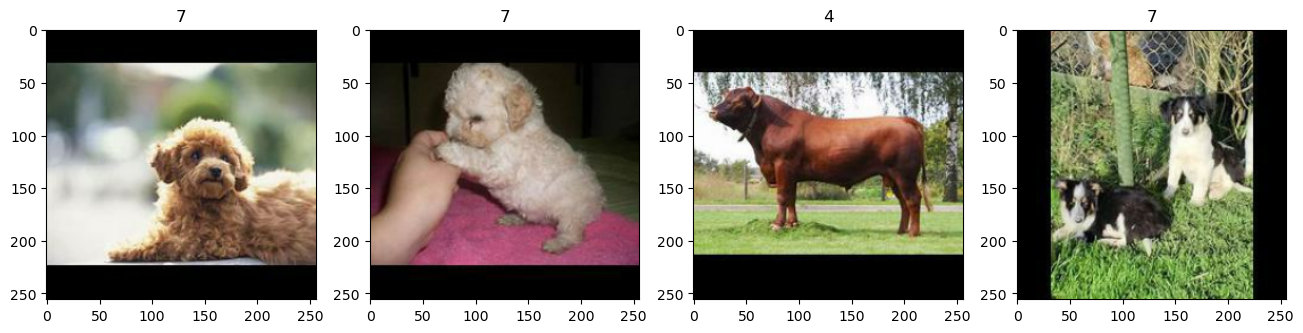

In [15]:
#Check scaled data images
scaled_it = scaled_images.as_numpy_iterator()
batch = scaled_it.next()
fig, ax =plt.subplots(ncols = 4, figsize = (16,16))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [16]:
len(scaled_images)

540

In [17]:
#Split images into train, validation and test
train_size = int(len(scaled_images)*.7)
validation_size = int(len(scaled_images)*.2)+1
test_size = int(len(scaled_images)*.1)

In [18]:
display(train_size)
display(validation_size)
display(test_size)

378

109

54